In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
import pandas as pd
import glob

import sys; sys.path.insert(0, "../utils/")
from data_utils import get_data_location, SAMPLE_PATH
from ml_pipeline import ModelEvaluation

DATA_PATH = get_data_location()

In [5]:
DATA_PATH

'/Volumes/mrichte/covlus_bmicnas02/'

In [2]:
# Path to segmentation masks
# SEGMENTATION_PATH = "/itet-stor/mrichte/covlus_bmicnas02/cropped_videos_segmented/post_processing"
# segmentation_path = "/Users/matthiasrichter/Library/CloudStorage/OneDrive-Personal/Studium/Masterthesis/Sample"

# List all files & directories
vid_files = os.listdir(SAMPLE_PATH)

# keep only .gif files that end with _mask
vid_files = [x for x in vid_files if x.endswith(".mp4")]

print(f"Found {len(vid_files)} videos")

FILE_NO = 0

Found 1 videos


In [3]:
import cv2
import numpy as np
from PIL import Image
import pandas as pd

vid = os.path.join(SAMPLE_PATH, vid_files[FILE_NO])

capture = cv2.VideoCapture(vid)
video_arr = []
video_ind = 0
while True:
    # capture frame-by-frame from video file
    ret, frame = capture.read()
    if not ret:
        break
    frame = Image.fromarray(frame, mode="RGB")
    frame = frame.convert('L')
    frame = np.asarray(frame)
    video_ind += 1
    video_arr.append(frame)
video_arr = np.array(video_arr)
capture.release()

video_arr.shape

(101, 350, 350)

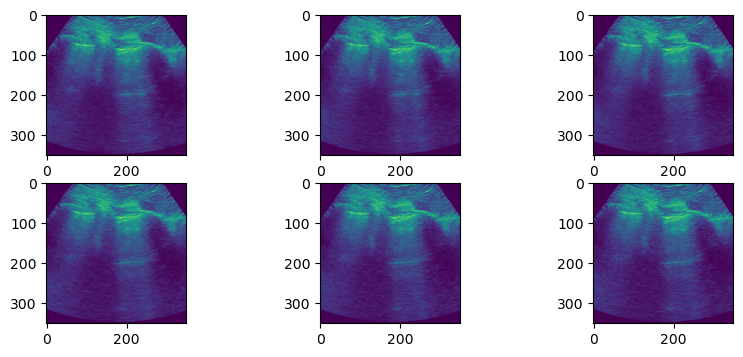

In [4]:
# Plot first 9 frames with mask overlay
fig, ax = plt.subplots(2, 3, figsize=(10, 4))
for i in range(6):
    ax[i // 3, i % 3].imshow(video_arr[i])

In [54]:
from skimage.transform import resize

# Resize all classes by a factor of resize_factor
resize_factor = 6
resized_vid = []
for f in video_arr:
    resized_vid.append(resize(f, (f.shape[0] // resize_factor, f.shape[1] // resize_factor), anti_aliasing=True))
resized_vid = np.asarray(resized_vid)
resized_vid.shape

(101, 58, 58)

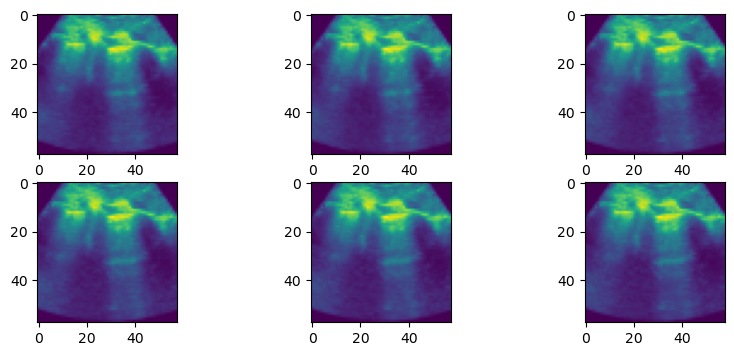

In [55]:
# Plot first 9 frames with mask overlay
fig, ax = plt.subplots(2, 3, figsize=(10, 4))
for i in range(6):
    ax[i // 3, i % 3].imshow(resized_vid[i])

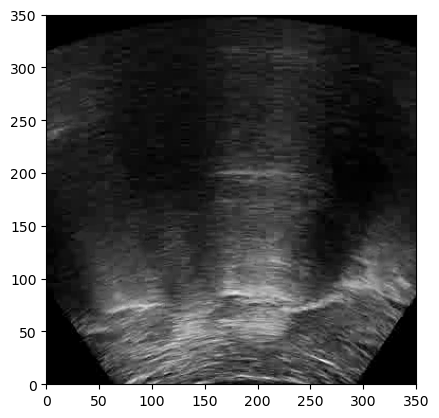

In [56]:
# Animated fly through of the cropped volumes
from matplotlib import animation, rc
from IPython.display import HTML

def animate_volume(volume):
    fig = plt.figure()
    ax = plt.axes(xlim=(0, volume.shape[1]), ylim=(0, volume.shape[2]))
    im = ax.imshow(volume[0], cmap="gray")
    def animate(i):
        im.set_array(volume[i])
        return [im]
    anim = animation.FuncAnimation(fig, animate, frames=volume.shape[0], interval=50, blit=True)
    return anim

# Animate the 4th class
anim = animate_volume(video_arr)
HTML(anim.to_html5_video())

In [57]:
from gtda.homology import CubicalPersistence

CP = CubicalPersistence(homology_dimensions=(0,1,2), n_jobs=-1)
cubical_persistence = CP.fit_transform(video_arr[np.newaxis, :, :, :])

# Plot the persistence diagrams example
CP.plot(cubical_persistence)

In [ ]:
# Load the persistence diagrams
import pickle
with open("class__cubical_persistence.pickle", "rb") as f:
    class__cubical_persistence = pickle.load(f)



In [ ]:

# Plot the persistence diagrams example
cubical_persistence.plot(class__cubical_persistence[1])


In [211]:
# Compute Betti curves
from gtda.diagrams import BettiCurve

betti_curve = BettiCurve(n_jobs=-1)
class_4_betti_curves = betti_curve.fit_transform(class_4_cubical_persistence)

# Plot the Betti curves
betti_curve.plot(class_4_betti_curves)

In [212]:
class_4_betti_curves.shape

(1, 2, 100)

In [213]:
class_4_betti_curves.flatten().shape

(200,)

In [218]:
# Compute persistence images
from gtda.diagrams import PersistenceImage

persistence_image = PersistenceImage(n_bins=50, n_jobs=-1)
class_4_persistence_images = persistence_image.fit_transform(class_4_cubical_persistence)

# Plot the persistence images
persistence_image.plot(class_4_persistence_images, homology_dimension_idx = 1)

In [215]:
class_4_persistence_images.shape

(1, 2, 50, 50)

In [220]:
class_4_persistence_images.flatten().shape

(5000,)